In [ ]:
"Hotel of California"


In [2]:
length_sec = 5*60+41
lenght_char = 1742

In [13]:
def sum_string(text):
    from collections import defaultdict
    # text = 'Mary had a little lamb'.replace(" ","")
    chars = defaultdict(int)

    for char in text:
        chars[char.lower()] += 1
    return sum(chars.values())
#     print(chars)
#     print(sum(chars.values()))

In [15]:
cnt = 0
with open('/root/Montreal-Forced-Aligner/Hotel/Hotel_California.lab') as f:
    lines = f.readlines()
    for line in lines:
        cnt += sum_string(line)
print(cnt)

1742


In [17]:
# test abc-3

# probs_seq1 = [[
#             0.06390443, 0.42124858, 0.27323887, 0.06870235, 0.0361254,
#             0.18184413, 0.16493624
#         ], [
#             0.03309247, 0.42866108, 0.24390638, 0.09699597, 0.31895462,
#             0.0094893, 0.06890021
#         ], [
#             0.218104, 0.49992557, 0.18245131, 0.08503348, 0.14903535,
#             0.08424043, 0.08120984
#         ], [
#             0.12094152, 0.41162472, 0.01473646, 0.28045061, 0.24246305,
#             0.05206269, 0.09772094
#         ], [
#             0.9333387, 0.40550838, 0.00301669, 0.21745861, 0.20803985,
#             0.41317442, 0.01946335
#         ], [
#             0.16468227, 0.4180699, 0.1906545, 0.53963251, 0.19860937,
#             0.04377724, 0.01457421
#         ]]
import time
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
torch.set_printoptions(precision=2)


import ctc

T, B, C = length_sec*2205, 1, 27
t = lenght_char
blank = 0
device = 'cuda'
seed = 1
atol = 1e-3
for set_seed in [torch.manual_seed] + ([torch.cuda.manual_seed_all] if device == 'cuda' else []):
	set_seed(seed)
tictoc = lambda: (device == 'cuda' and torch.cuda.synchronize()) or time.time()

logits = torch.randn(T, B, C, device = device).requires_grad_()
# import numpy
# logits = torch.reshape(torch.as_tensor(numpy.array(numpy.log(probs_seq1)),device = device), (6,1,7)).requires_grad_()

targets = torch.randint(blank + 1, C, (B, t), dtype = torch.long, device = device)
# targets = torch.reshape(torch.as_tensor(numpy.array([1,2,3]), dtype = torch.long, device = device), (B, t))



input_lengths = torch.full((B,), T, dtype = torch.long, device = device)
target_lengths = torch.full((B,), t, dtype = torch.long, device = device)
log_probs = logits.log_softmax(dim = -1)
# print("log_probs",log_probs)
# print('Device:', device)
# print('Log-probs shape (time X batch X channels):', 'x'.join(map(str, log_probs.shape)))

# tic = tictoc()
# builtin_ctc = F.ctc_loss(log_probs, targets, input_lengths, target_lengths, blank = 0, reduction = 'none')
# toc = tictoc()
# builtin_ctc_grad, = torch.autograd.grad(builtin_ctc.sum(), logits, retain_graph = True)
# print('Built-in CTC loss', 'fwd', toc - tic, 'bwd', tictoc() - toc)

# tic = tictoc()
# custom_ctc = ctc_loss(log_probs, targets, input_lengths, target_lengths, blank = 0, reduction = 'none')
# toc = tictoc()
# custom_ctc_grad, = torch.autograd.grad(custom_ctc.sum(), logits, retain_graph = True)
# print('Custom CTC loss', 'fwd', toc - tic, 'bwd', tictoc() - toc)

# ce_alignment_targets = ctc_alignment_targets(log_probs, targets, input_lengths, target_lengths, blank = 0)
# ce_ctc = -ce_alignment_targets * log_probs
# ce_ctc_grad, = torch.autograd.grad(ce_ctc.sum(), logits, retain_graph = True)

# print('Custom loss matches:', torch.allclose(builtin_ctc, custom_ctc, atol = atol))
# print('Grad matches:', torch.allclose(builtin_ctc_grad, custom_ctc_grad, atol = atol))
# print('CE grad matches:', torch.allclose(builtin_ctc_grad, ce_ctc_grad, atol = atol))

tic = tictoc()
alignment = ctc.ctc_loss(log_probs, targets, input_lengths, target_lengths, blank = 0, reduction = 'none', alignment = True)
print('Alignment: ',tictoc() - tic)

a = alignment[:, 0, :target_lengths[0]]
# print(a.t().cpu())
plt.subplot(211)
plt.title('Input-Output Viterbi alignment')
plt.imshow(a.t().cpu(), origin = 'lower', aspect = 'auto')
plt.xlabel('Input steps')
plt.ylabel('Output steps')
# plt.subplot(212)
# plt.title('CTC alignment targets')
# a = ce_alignment_targets[:, 0, :]
# plt.imshow(a.t().cpu(), origin = 'lower', aspect = 'auto')
# plt.xlabel('Input steps')
# plt.ylabel(f'Output symbols, blank {blank}')
# plt.subplots_adjust(hspace = 0.5)
# plt.savefig('alignment.png')
# torch.set_printoptions(precision=2)
# print(a.t().cpu())
# print(targets[:,0])
# print(logits)




RuntimeError: CUDA out of memory. Tried to allocate 2.00 MiB (GPU 0; 31.72 GiB total capacity; 29.09 GiB already allocated; 3.94 MiB free; 64.05 MiB cached)

In [ ]:
# test abc-3

# probs_seq1 = [[
#             0.06390443, 0.42124858, 0.27323887, 0.06870235, 0.0361254,
#             0.18184413, 0.16493624
#         ], [
#             0.03309247, 0.42866108, 0.24390638, 0.09699597, 0.31895462,
#             0.0094893, 0.06890021
#         ], [
#             0.218104, 0.49992557, 0.18245131, 0.08503348, 0.14903535,
#             0.08424043, 0.08120984
#         ], [
#             0.12094152, 0.41162472, 0.01473646, 0.28045061, 0.24246305,
#             0.05206269, 0.09772094
#         ], [
#             0.9333387, 0.40550838, 0.00301669, 0.21745861, 0.20803985,
#             0.41317442, 0.01946335
#         ], [
#             0.16468227, 0.4180699, 0.1906545, 0.53963251, 0.19860937,
#             0.04377724, 0.01457421
#         ]]
import time
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
torch.set_printoptions(precision=2)


import ctc

T, B, C = length_sec*2205, 1, 27
t = lenght_char
blank = 0
device = 'cpu'
seed = 1
atol = 1e-3
for set_seed in [torch.manual_seed] + ([torch.cuda.manual_seed_all] if device == 'cuda' else []):
	set_seed(seed)
tictoc = lambda: (device == 'cuda' and torch.cuda.synchronize()) or time.time()

logits = torch.randn(T, B, C, device = device).requires_grad_()
# import numpy
# logits = torch.reshape(torch.as_tensor(numpy.array(numpy.log(probs_seq1)),device = device), (6,1,7)).requires_grad_()

targets = torch.randint(blank + 1, C, (B, t), dtype = torch.long, device = device)
# targets = torch.reshape(torch.as_tensor(numpy.array([1,2,3]), dtype = torch.long, device = device), (B, t))



input_lengths = torch.full((B,), T, dtype = torch.long, device = device)
target_lengths = torch.full((B,), t, dtype = torch.long, device = device)
log_probs = logits.log_softmax(dim = -1)
# print("log_probs",log_probs)
# print('Device:', device)
# print('Log-probs shape (time X batch X channels):', 'x'.join(map(str, log_probs.shape)))

# tic = tictoc()
# builtin_ctc = F.ctc_loss(log_probs, targets, input_lengths, target_lengths, blank = 0, reduction = 'none')
# toc = tictoc()
# builtin_ctc_grad, = torch.autograd.grad(builtin_ctc.sum(), logits, retain_graph = True)
# print('Built-in CTC loss', 'fwd', toc - tic, 'bwd', tictoc() - toc)

# tic = tictoc()
# custom_ctc = ctc_loss(log_probs, targets, input_lengths, target_lengths, blank = 0, reduction = 'none')
# toc = tictoc()
# custom_ctc_grad, = torch.autograd.grad(custom_ctc.sum(), logits, retain_graph = True)
# print('Custom CTC loss', 'fwd', toc - tic, 'bwd', tictoc() - toc)

# ce_alignment_targets = ctc_alignment_targets(log_probs, targets, input_lengths, target_lengths, blank = 0)
# ce_ctc = -ce_alignment_targets * log_probs
# ce_ctc_grad, = torch.autograd.grad(ce_ctc.sum(), logits, retain_graph = True)

# print('Custom loss matches:', torch.allclose(builtin_ctc, custom_ctc, atol = atol))
# print('Grad matches:', torch.allclose(builtin_ctc_grad, custom_ctc_grad, atol = atol))
# print('CE grad matches:', torch.allclose(builtin_ctc_grad, ce_ctc_grad, atol = atol))

tic = tictoc()
alignment = ctc.ctc_loss(log_probs, targets, input_lengths, target_lengths, blank = 0, reduction = 'none', alignment = True)
print('Alignment: ',tictoc() - tic)

a = alignment[:, 0, :target_lengths[0]]
# print(a.t().cpu())
plt.subplot(211)
plt.title('Input-Output Viterbi alignment')
plt.imshow(a.t().cpu(), origin = 'lower', aspect = 'auto')
plt.xlabel('Input steps')
plt.ylabel('Output steps')
# plt.subplot(212)
# plt.title('CTC alignment targets')
# a = ce_alignment_targets[:, 0, :]
# plt.imshow(a.t().cpu(), origin = 'lower', aspect = 'auto')
# plt.xlabel('Input steps')
# plt.ylabel(f'Output symbols, blank {blank}')
# plt.subplots_adjust(hspace = 0.5)
# plt.savefig('alignment.png')
# torch.set_printoptions(precision=2)
# print(a.t().cpu())
# print(targets[:,0])
# print(logits)


"crash!!!"


Alignment:  16.461628437042236


Text(0, 0.5, 'Output steps')

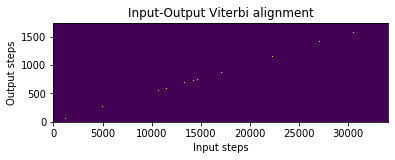

In [3]:
# test abc-3

# probs_seq1 = [[
#             0.06390443, 0.42124858, 0.27323887, 0.06870235, 0.0361254,
#             0.18184413, 0.16493624
#         ], [
#             0.03309247, 0.42866108, 0.24390638, 0.09699597, 0.31895462,
#             0.0094893, 0.06890021
#         ], [
#             0.218104, 0.49992557, 0.18245131, 0.08503348, 0.14903535,
#             0.08424043, 0.08120984
#         ], [
#             0.12094152, 0.41162472, 0.01473646, 0.28045061, 0.24246305,
#             0.05206269, 0.09772094
#         ], [
#             0.9333387, 0.40550838, 0.00301669, 0.21745861, 0.20803985,
#             0.41317442, 0.01946335
#         ], [
#             0.16468227, 0.4180699, 0.1906545, 0.53963251, 0.19860937,
#             0.04377724, 0.01457421
#         ]]
import time
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
torch.set_printoptions(precision=2)


import ctc

T, B, C = length_sec*100, 1, 27
t = lenght_char
blank = 0
device = 'cpu'
seed = 1
atol = 1e-3
for set_seed in [torch.manual_seed] + ([torch.cuda.manual_seed_all] if device == 'cuda' else []):
	set_seed(seed)
tictoc = lambda: (device == 'cuda' and torch.cuda.synchronize()) or time.time()

logits = torch.randn(T, B, C, device = device).requires_grad_()
# import numpy
# logits = torch.reshape(torch.as_tensor(numpy.array(numpy.log(probs_seq1)),device = device), (6,1,7)).requires_grad_()

targets = torch.randint(blank + 1, C, (B, t), dtype = torch.long, device = device)
# targets = torch.reshape(torch.as_tensor(numpy.array([1,2,3]), dtype = torch.long, device = device), (B, t))



input_lengths = torch.full((B,), T, dtype = torch.long, device = device)
target_lengths = torch.full((B,), t, dtype = torch.long, device = device)
log_probs = logits.log_softmax(dim = -1)
# print("log_probs",log_probs)
# print('Device:', device)
# print('Log-probs shape (time X batch X channels):', 'x'.join(map(str, log_probs.shape)))

# tic = tictoc()
# builtin_ctc = F.ctc_loss(log_probs, targets, input_lengths, target_lengths, blank = 0, reduction = 'none')
# toc = tictoc()
# builtin_ctc_grad, = torch.autograd.grad(builtin_ctc.sum(), logits, retain_graph = True)
# print('Built-in CTC loss', 'fwd', toc - tic, 'bwd', tictoc() - toc)

# tic = tictoc()
# custom_ctc = ctc_loss(log_probs, targets, input_lengths, target_lengths, blank = 0, reduction = 'none')
# toc = tictoc()
# custom_ctc_grad, = torch.autograd.grad(custom_ctc.sum(), logits, retain_graph = True)
# print('Custom CTC loss', 'fwd', toc - tic, 'bwd', tictoc() - toc)

# ce_alignment_targets = ctc_alignment_targets(log_probs, targets, input_lengths, target_lengths, blank = 0)
# ce_ctc = -ce_alignment_targets * log_probs
# ce_ctc_grad, = torch.autograd.grad(ce_ctc.sum(), logits, retain_graph = True)

# print('Custom loss matches:', torch.allclose(builtin_ctc, custom_ctc, atol = atol))
# print('Grad matches:', torch.allclose(builtin_ctc_grad, custom_ctc_grad, atol = atol))
# print('CE grad matches:', torch.allclose(builtin_ctc_grad, ce_ctc_grad, atol = atol))

tic = tictoc()
alignment = ctc.ctc_loss(log_probs, targets, input_lengths, target_lengths, blank = 0, reduction = 'none', alignment = True)
print('Alignment: ',tictoc() - tic)

a = alignment[:, 0, :target_lengths[0]]
# print(a.t().cpu())
plt.subplot(211)
plt.title('Input-Output Viterbi alignment')
plt.imshow(a.t().cpu(), origin = 'lower', aspect = 'auto')
plt.xlabel('Input steps')
plt.ylabel('Output steps')
# plt.subplot(212)
# plt.title('CTC alignment targets')
# a = ce_alignment_targets[:, 0, :]
# plt.imshow(a.t().cpu(), origin = 'lower', aspect = 'auto')
# plt.xlabel('Input steps')
# plt.ylabel(f'Output symbols, blank {blank}')
# plt.subplots_adjust(hspace = 0.5)
# plt.savefig('alignment.png')
# torch.set_printoptions(precision=2)
# print(a.t().cpu())
# print(targets[:,0])
# print(logits)





Alignment:  38.76677966117859


Text(0, 0.5, 'Output steps')

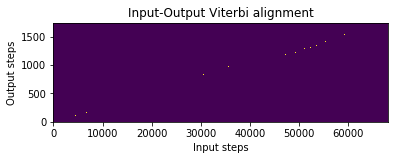

In [5]:
# test abc-3

# probs_seq1 = [[
#             0.06390443, 0.42124858, 0.27323887, 0.06870235, 0.0361254,
#             0.18184413, 0.16493624
#         ], [
#             0.03309247, 0.42866108, 0.24390638, 0.09699597, 0.31895462,
#             0.0094893, 0.06890021
#         ], [
#             0.218104, 0.49992557, 0.18245131, 0.08503348, 0.14903535,
#             0.08424043, 0.08120984
#         ], [
#             0.12094152, 0.41162472, 0.01473646, 0.28045061, 0.24246305,
#             0.05206269, 0.09772094
#         ], [
#             0.9333387, 0.40550838, 0.00301669, 0.21745861, 0.20803985,
#             0.41317442, 0.01946335
#         ], [
#             0.16468227, 0.4180699, 0.1906545, 0.53963251, 0.19860937,
#             0.04377724, 0.01457421
#         ]]
import time
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
torch.set_printoptions(precision=2)


import ctc

T, B, C = length_sec*200, 1, 27
t = lenght_char
blank = 0
device = 'cpu'
seed = 1
atol = 1e-3
for set_seed in [torch.manual_seed] + ([torch.cuda.manual_seed_all] if device == 'cuda' else []):
	set_seed(seed)
tictoc = lambda: (device == 'cuda' and torch.cuda.synchronize()) or time.time()

logits = torch.randn(T, B, C, device = device).requires_grad_()
# import numpy
# logits = torch.reshape(torch.as_tensor(numpy.array(numpy.log(probs_seq1)),device = device), (6,1,7)).requires_grad_()

targets = torch.randint(blank + 1, C, (B, t), dtype = torch.long, device = device)
# targets = torch.reshape(torch.as_tensor(numpy.array([1,2,3]), dtype = torch.long, device = device), (B, t))



input_lengths = torch.full((B,), T, dtype = torch.long, device = device)
target_lengths = torch.full((B,), t, dtype = torch.long, device = device)
log_probs = logits.log_softmax(dim = -1)
# print("log_probs",log_probs)
# print('Device:', device)
# print('Log-probs shape (time X batch X channels):', 'x'.join(map(str, log_probs.shape)))

# tic = tictoc()
# builtin_ctc = F.ctc_loss(log_probs, targets, input_lengths, target_lengths, blank = 0, reduction = 'none')
# toc = tictoc()
# builtin_ctc_grad, = torch.autograd.grad(builtin_ctc.sum(), logits, retain_graph = True)
# print('Built-in CTC loss', 'fwd', toc - tic, 'bwd', tictoc() - toc)

# tic = tictoc()
# custom_ctc = ctc_loss(log_probs, targets, input_lengths, target_lengths, blank = 0, reduction = 'none')
# toc = tictoc()
# custom_ctc_grad, = torch.autograd.grad(custom_ctc.sum(), logits, retain_graph = True)
# print('Custom CTC loss', 'fwd', toc - tic, 'bwd', tictoc() - toc)

# ce_alignment_targets = ctc_alignment_targets(log_probs, targets, input_lengths, target_lengths, blank = 0)
# ce_ctc = -ce_alignment_targets * log_probs
# ce_ctc_grad, = torch.autograd.grad(ce_ctc.sum(), logits, retain_graph = True)

# print('Custom loss matches:', torch.allclose(builtin_ctc, custom_ctc, atol = atol))
# print('Grad matches:', torch.allclose(builtin_ctc_grad, custom_ctc_grad, atol = atol))
# print('CE grad matches:', torch.allclose(builtin_ctc_grad, ce_ctc_grad, atol = atol))

tic = tictoc()
alignment = ctc.ctc_loss(log_probs, targets, input_lengths, target_lengths, blank = 0, reduction = 'none', alignment = True)
print('Alignment: ',tictoc() - tic)

a = alignment[:, 0, :target_lengths[0]]
# print(a.t().cpu())
plt.subplot(211)
plt.title('Input-Output Viterbi alignment')
plt.imshow(a.t().cpu(), origin = 'lower', aspect = 'auto')
plt.xlabel('Input steps')
plt.ylabel('Output steps')
# plt.subplot(212)
# plt.title('CTC alignment targets')
# a = ce_alignment_targets[:, 0, :]
# plt.imshow(a.t().cpu(), origin = 'lower', aspect = 'auto')
# plt.xlabel('Input steps')
# plt.ylabel(f'Output symbols, blank {blank}')
# plt.subplots_adjust(hspace = 0.5)
# plt.savefig('alignment.png')
# torch.set_printoptions(precision=2)
# print(a.t().cpu())
# print(targets[:,0])
# print(logits)






In [7]:
print(T*B*C*4/1000000,"mb")
print("system usage: ", 64*0.123)

7.3656 mb
system usage:  7.872
